# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
import math 


## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
users = pd.read_csv('/datasets/megaline_users.csv')
calls = pd.read_csv('/datasets/megaline_calls.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans = pd.read_csv('/datasets/megaline_plans.csv')
plans.info()
summary_plans = plans.describe()
print (summary_plans)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15

In [4]:
# Imprime una muestra de los datos para las tarifas
print (plans.head(10))

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

En este dataset podemos encontrar informacion descriptiva sobre ambos planes, tambien podemos notar que no hay datos ausentes, los tipos de datos son adecuados y no creo que se necesite realizar una invesigacion o cambios adicionales debido a que solo se desriben caracteisticas generales de los planes.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.] No creo que haya datos que corregir pero igual me puedo asegurar que no haya duplicados, datos nulos y que el tipo de datos sea correcto.

In [5]:
print("Nombres de las columnas:", plans.columns)
duplicates = plans.duplicated().sum()
print(f"Número de filas duplicadas: {duplicates}")
null_values = plans.isnull().sum()
print("Valores nulos en cada columna:")
print(null_values)
print("Tipos de datos:")
print(plans.dtypes)

Nombres de las columnas: Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')
Número de filas duplicadas: 0
Valores nulos en cada columna:
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
Tipos de datos:
messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]
No creo que sea neceario agregar factores adicionales.

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users = pd.read_csv('/datasets/megaline_users.csv')
users.info()
summary_users = users.describe()
print (summary_users)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


In [7]:
# Imprime una muestra de datos para usuarios
print (users.head(10))


   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
En base a los resultados obtenidos podemos observar dos problemas, el primero es que la tabla 'churn_date' tiene una gran cantidad de valores ausentes, esto se debe a que son usuarios que aun han cancelado su plan, por lo que hay que agregar otra columna que diga que siguen activos por si es necesario esta informacion mas adelante, el segundo problema es visible es que reg_date y churn_date estan clasificados como tipos de dato object y estos datos deben ser del tipo datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [9]:
users['is_active'] = users['churn_date'].isna()
print(users.info())
print(users.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   is_active   500 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(2), object(4)
memory usage: 31.9+ KB
None
   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    

## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls = pd.read_csv('/datasets/megaline_calls.csv')
calls.info()
summary_calls = calls.describe()
print (summary_calls)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


In [11]:
# Imprime una muestra de datos para las llamadas
print(calls.head(10))


         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Se pueden observar dos problemas, el primero es que la columna call_date esta asignada como tipo objet cuando deberia ser timpo Datetime, lo segundo es que el tiempo minimo en las llamadas es igual a 0, en el caso de estas llamadas se puede inferir que fueron llamadas sin respuesta, al analizar el dataset podemos ver que es un numero considerable de llamadas sin respuesta por lo que seria importante no perder esta informacion, y mas bien crear una columna adicional que nos identifique si la llamada fue contestada o no.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [13]:
calls_with_zero_duration = calls[calls['duration'] == 0]
print(f"Número de llamadas con duración 0: {len(calls_with_zero_duration)}")
calls['is_effective'] = calls['duration'] > 0
print(calls.info())
print(calls.head(20))

Número de llamadas con duración 0: 26834
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            137735 non-null  object        
 1   user_id       137735 non-null  int64         
 2   call_date     137735 non-null  datetime64[ns]
 3   duration      137735 non-null  float64       
 4   is_effective  137735 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.3+ MB
None
          id  user_id  call_date  duration  is_effective
0    1000_93     1000 2018-12-27      8.52          True
1   1000_145     1000 2018-12-27     13.66          True
2   1000_247     1000 2018-12-27     14.48          True
3   1000_309     1000 2018-12-28      5.76          True
4   1000_380     1000 2018-12-30      4.22          True
5   1000_388     1000 2018-12-31      2.20          Tru

## Mensajes

In [14]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages = pd.read_csv('/datasets/megaline_messages.csv')
messages.info()
summary_messages = messages.describe()
print (summary_messages)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
            user_id
count  76051.000000
mean    1245.972768
std      139.843635
min     1000.000000
25%     1123.000000
50%     1251.000000
75%     1362.000000
max     1497.000000


In [15]:
# Imprime una muestra de datos para los mensajes
print(messages.head(10))


         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
5  1000_346     1000   2018-12-29
6  1000_386     1000   2018-12-30
7  1000_413     1000   2018-12-31
8  1000_502     1000   2018-12-27
9  1000_525     1000   2018-12-28


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
No se encuentran datos nulos, el unico problema o detalle es que la columna message_date es una columna de tipo object y al ser una fecha hay que cambiarla al tipo datetime.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [16]:
messages["message_date"] = pd.to_datetime(messages["message_date"])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [17]:
print(messages.info())
print(messages.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


## Internet

In [18]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet = pd.read_csv('/datasets/megaline_internet.csv')
internet.info()
summary_internet = internet.describe()
print (summary_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


In [19]:
# Imprime una muestra de datos para el tráfico de internet
print(internet.head(10))


         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]
Se pueden observar dos problemas con el Dataset los cuales son los mismos dos problemas son el Dataset calls, los cuales son la columna session_date es del tipo objet y hay que cambiarla al tipo datetime al ser una fecha, y la columna mb_used a pesar de no tener valores ausentes si tiene valores en 0 por lo que hay que crear otra columna de gente que no consume datos, ya que de igual manera el numero de personas con 0 es un numero significativo de usuarios.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
internet['session_date'] = pd.to_datetime(internet['session_date'])

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
internet_with_zero_usage = internet[internet['mb_used'] == 0]
print(f"Número de sesiones con mb_used igual a 0: {len(internet_with_zero_usage)}")
internet['spend_megas'] = internet['mb_used'] > 0
print(internet.info())
print(internet.head(10))

Número de sesiones con mb_used igual a 0: 13747
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   spend_megas   104825 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.3+ MB
None
         id  user_id session_date  mb_used  spend_megas
0   1000_13     1000   2018-12-29    89.86         True
1  1000_204     1000   2018-12-31     0.00        False
2  1000_379     1000   2018-12-28   660.40         True
3  1000_413     1000   2018-12-26   270.99         True
4  1000_442     1000   2018-12-27   880.22         True
5    1001_0     1001   2018-08-24   284.68         Tru

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
print(plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [23]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls['month_year'] = calls['call_date'].dt.to_period('M')
calls_per_month = calls.groupby(['user_id', 'month_year']).size().reset_index(name='call_count')
print("Cantidad total de registros en calls X month:", len(calls_per_month))
calls_per_month.to_csv('calls_per_month.csv', index=False)


Cantidad total de registros en calls X month: 2258


In [24]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls['month_year'] = calls['call_date'].dt.to_period('M')
minutes_per_month = calls.groupby(['user_id', 'month_year'])['duration'].sum().reset_index()
minutes_per_month = minutes_per_month.rename(columns={'duration': 'total_minutes'})
print("Cantidad total de registros en minutes_per_month:", len(minutes_per_month))
minutes_per_month.to_csv('minutes_per_month.csv', index=False)


Cantidad total de registros en minutes_per_month: 2258


In [25]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages['month_year'] = messages['message_date'].dt.to_period('M')
messages_per_month = messages.groupby(['user_id', 'month_year']).size().reset_index(name='message_count')
messages_per_month = messages.groupby(['user_id', 'month_year']).size().reset_index(name='message_count')
print("Cantidad total de registros en messages_per_month:", len(messages_per_month))
messages_per_month.to_csv('messages_per_month.csv', index=False)


Cantidad total de registros en messages_per_month: 1806


In [26]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet['month_year'] = internet['session_date'].dt.to_period('M')
data_usage_per_month = internet.groupby(['user_id', 'month_year'])['mb_used'].sum().reset_index()
data_usage_per_month = data_usage_per_month.rename(columns={'mb_used': 'total_mb_used'})
print("Cantidad total de registros en data_usage_per_month:", len(data_usage_per_month))
data_usage_per_month.to_csv('data_usage_per_month.csv', index=False)


Cantidad total de registros en data_usage_per_month: 2277


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [27]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

calls_per_month['month_year'] = calls_per_month['month_year'].astype(str)
minutes_per_month['month_year'] = minutes_per_month['month_year'].astype(str)
messages_per_month['month_year'] = messages_per_month['month_year'].astype(str)
data_usage_per_month['month_year'] = data_usage_per_month['month_year'].astype(str)

merged_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month_year'], how='outer')
merged_data = pd.merge(merged_data, messages_per_month, on=['user_id', 'month_year'], how='outer')
merged_data = pd.merge(merged_data, data_usage_per_month, on=['user_id', 'month_year'], how='outer')


merged_data.fillna(0, inplace=True)


print("Cantidad total de registros en merged_data:", len(merged_data))
merged_data.to_csv('merged_data.csv', index=False)



Cantidad total de registros en merged_data: 2293


In [28]:
# Añade la información de la tarifa
merged_data = pd.merge(merged_data, users[['user_id', 'plan']], on='user_id', how='left')
print("Columnas en merged_data antes de añadir 'plans':", merged_data.columns)
merged_data = pd.merge(merged_data, plans, left_on='plan', right_on='plan_name', how='left')
print("Columnas en merged_data después de añadir 'plans':", merged_data.columns)



Columnas en merged_data antes de añadir 'plans': Index(['user_id', 'month_year', 'call_count', 'total_minutes', 'message_count',
       'total_mb_used', 'plan'],
      dtype='object')
Columnas en merged_data después de añadir 'plans': Index(['user_id', 'month_year', 'call_count', 'total_minutes', 'message_count',
       'total_mb_used', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name'],
      dtype='object')


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [29]:

calls_per_month['month_year'] = calls_per_month['month_year'].astype(str)
minutes_per_month['month_year'] = minutes_per_month['month_year'].astype(str)
messages_per_month['month_year'] = messages_per_month['month_year'].astype(str)
data_usage_per_month['month_year'] = data_usage_per_month['month_year'].astype(str)


merged_data = pd.merge(calls_per_month, minutes_per_month, on=['user_id', 'month_year'], how='outer')
merged_data = pd.merge(merged_data, messages_per_month, on=['user_id', 'month_year'], how='outer')
merged_data = pd.merge(merged_data, data_usage_per_month, on=['user_id', 'month_year'], how='outer')

merged_data.fillna(0, inplace=True)

merged_data = pd.merge(merged_data, users[['user_id', 'plan']], on='user_id', how='left')
merged_data = pd.merge(merged_data, plans, left_on='plan', right_on='plan_name', how='left')
merged_data['usd_per_mb'] = merged_data['usd_per_gb'] / 1024


def calculate_monthly_revenue(row):
    extra_messages = max(row['message_count'] - row['messages_included'], 0)
    extra_mb = max(row['total_mb_used'] - row['mb_per_month_included'], 0)
    extra_minutes = max(row['total_minutes'] - row['minutes_included'], 0)
    
    extra_costs = (extra_messages * row['usd_per_message'] +
                   extra_mb * row['usd_per_mb'] +
                   extra_minutes * row['usd_per_minute'])
    
    return row['usd_monthly_pay'] + extra_costs

# Calculo de los ingresos mensuales 
merged_data['monthly_revenue'] = merged_data.apply(calculate_monthly_revenue, axis=1)
merged_data['total_minutes'] = merged_data['total_minutes'].round()
merged_data['total_mb_used'] = merged_data['total_mb_used'].round()

print("Cantidad total de registros en merged_data:", len(merged_data))
merged_data.to_csv('merged_data_with_revenue.csv', index=False)

monthly_revenue_summary = merged_data.groupby(['user_id', 'month_year'])['monthly_revenue'].sum().reset_index()
print("Cantidad total de  ingresos mensuales para cada usuario es:", len(monthly_revenue_summary))
monthly_revenue_summary.to_csv('monthly_revenue_summary.csv', index=False)




Cantidad total de registros en merged_data: 2293
Cantidad total de  ingresos mensuales para cada usuario es: 2293


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

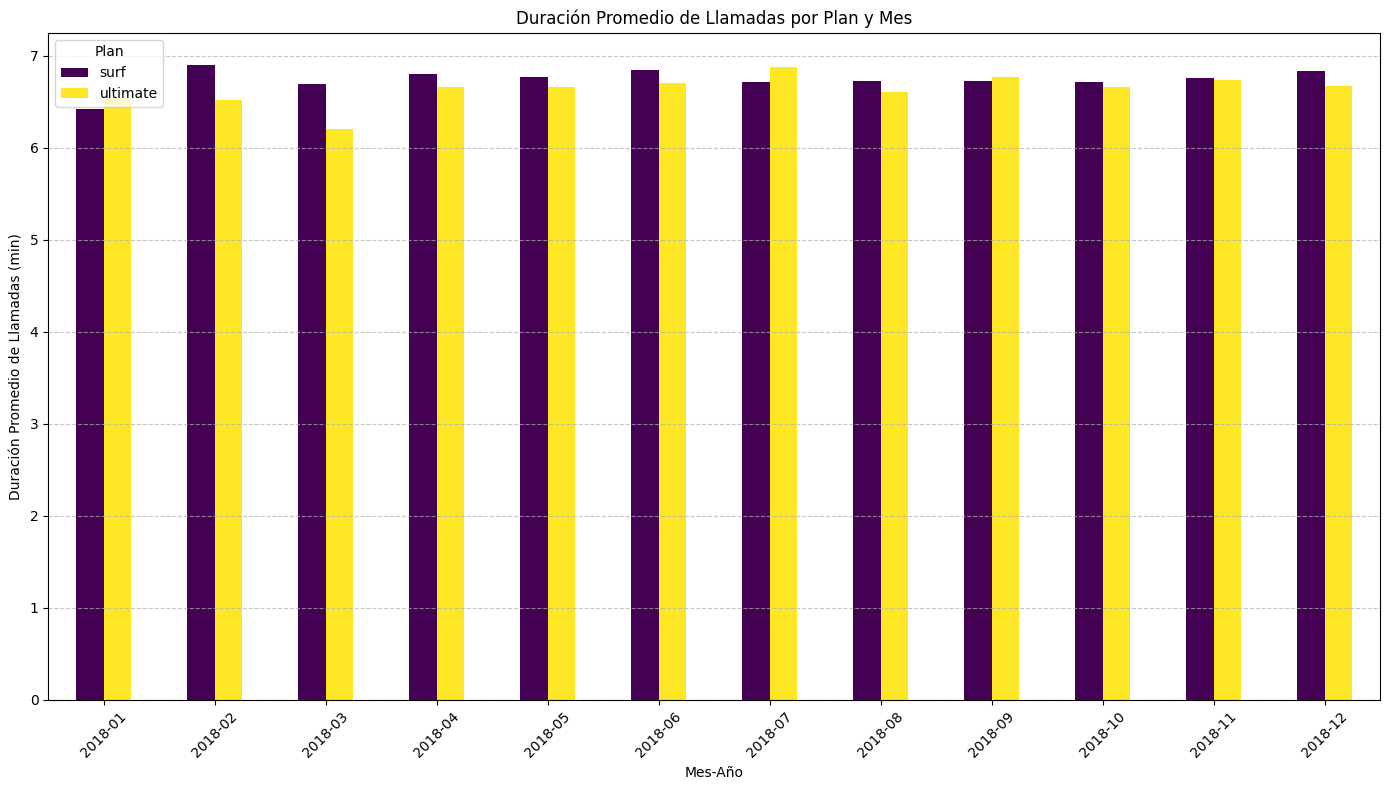

In [30]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

import matplotlib.pyplot as plt


# Crear una nueva columna 'month_year' que indique el mes y año
calls['month_year'] = calls['call_date'].dt.to_period('M')

# Añadir la información de la tarifa desde el DataFrame 'users'
calls = pd.merge(calls, users[['user_id', 'plan']], on='user_id', how='left')

# Agrupar los datos por 'plan' y 'month_year' para calcular la duración promedio de llamadas
avg_call_duration = calls.groupby(['plan', 'month_year'])['duration'].mean().reset_index()

# Convertir 'month_year' a cadena para facilitar el trazado
avg_call_duration['month_year'] = avg_call_duration['month_year'].astype(str)

# Pivotar los datos para trazarlos
pivot_table = avg_call_duration.pivot(index='month_year', columns='plan', values='duration')

# Trazar el gráfico de barras
pivot_table.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes-Año')
plt.ylabel('Duración Promedio de Llamadas (min)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


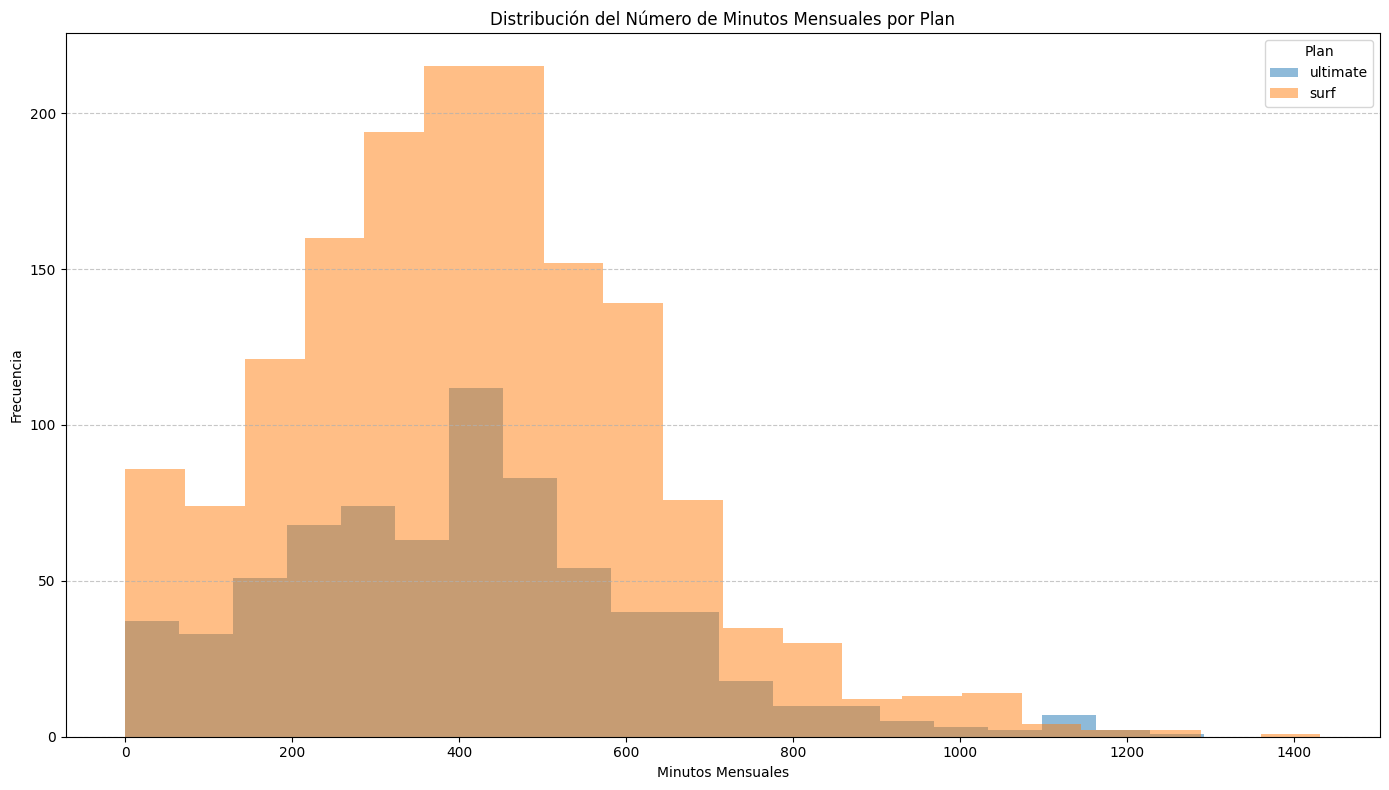

In [32]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month_year'] = calls['call_date'].dt.to_period('M')
calls = pd.merge(calls, users[['user_id', 'plan']], on='user_id', how='left')
monthly_minutes = calls.groupby(['user_id', 'plan', 'month_year'])['duration'].sum().reset_index()
plt.figure(figsize=(14, 8))
for plan in monthly_minutes['plan'].unique():
    subset = monthly_minutes[monthly_minutes['plan'] == plan]
    plt.hist(subset['duration'], bins=20, alpha=0.5, label=plan)

plt.title('Distribución del Número de Minutos Mensuales por Plan')
plt.xlabel('Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.

calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['month_year'] = calls['call_date'].dt.to_period('M')
calls = pd.merge(calls, users[['user_id', 'plan']], on='user_id', how='left')
monthly_call_duration = calls.groupby(['user_id', 'plan', 'month_year'])['duration'].sum().reset_index()
mean_duration_by_plan = monthly_call_duration.groupby('plan')['duration'].mean()
variance_duration_by_plan = monthly_call_duration.groupby('plan')['duration'].var()
print("Media de la duración mensual de llamadas por plan:")
print(mean_duration_by_plan)
print("\nVarianza de la duración mensual de llamadas por plan:")
print(variance_duration_by_plan)

Media de la duración mensual de llamadas por plan:
plan
surf        412.097890
ultimate    410.180954
Name: duration, dtype: float64

Varianza de la duración mensual de llamadas por plan:
plan
surf        47001.254231
ultimate    50510.631705
Name: duration, dtype: float64


<Figure size 1400x800 with 0 Axes>

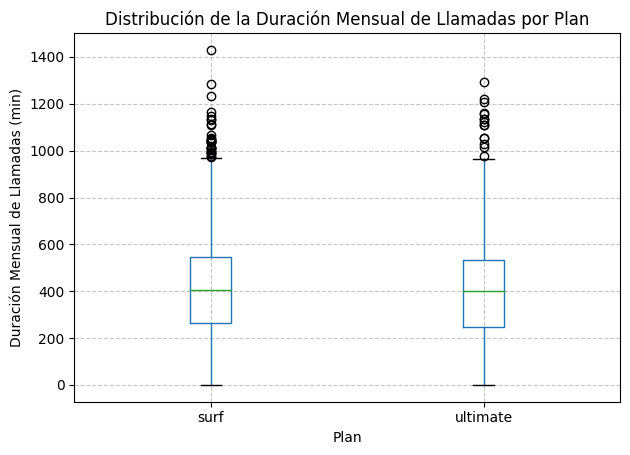

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plt.figure(figsize=(14, 8))
monthly_call_duration.boxplot(column='duration', by='plan', grid=False)
plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Duración Mensual de Llamadas (min)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]
        Aunque en ambos casos se observa una pequeña dferencía entre ambos valores esta diferencia no es tan significativa, por ejemplo en cuanto al promedio de minutos gastafos al mes solo hay una diferencia en la media de 2 minutos entre ambos planes y en cuanto a la varianza ambos planes presentan una una alta varianza que aunque ligeramente mayor para el plan ultimate, por lo que podemos concluir observando el diagrama de caja que la actividad para ambos planes tiene un comportamiento un poco diferente pero muy similar entre ambos, el unico comportamiento que podemos notar que varia significativamente es la cantidad de minutos que necesita cada uno de los usuarios por plan ya que el histograma arroja que el plan surf tiene una mayor frecuencia de uso.

### Mensajes

In [36]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['month_year'] = messages['message_date'].dt.to_period('M')
messages = pd.merge(messages, users[['user_id', 'plan']], on='user_id', how='left')
monthly_message_count = messages.groupby(['user_id', 'plan', 'month_year']).size().reset_index(name='message_count')
mean_messages_by_plan = monthly_message_count.groupby('plan')['message_count'].mean()
variance_messages_by_plan = monthly_message_count.groupby('plan')['message_count'].var()


In [37]:
print("Media del número de mensajes mensuales por plan:")
print(mean_messages_by_plan)
print("\nVarianza del número de mensajes mensuales por plan:")
print(variance_messages_by_plan)


Media del número de mensajes mensuales por plan:
plan
surf        40.109656
ultimate    46.296233
Name: message_count, dtype: float64

Varianza del número de mensajes mensuales por plan:
plan
surf        1091.344231
ultimate    1085.183108
Name: message_count, dtype: float64


<Figure size 1400x800 with 0 Axes>

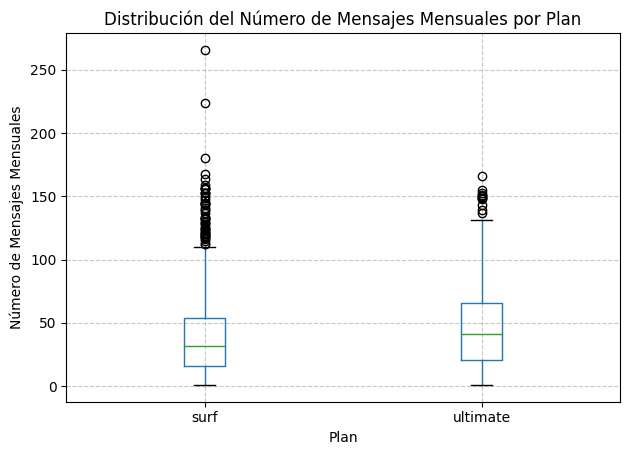

In [38]:
plt.figure(figsize=(14, 8))
monthly_message_count.boxplot(column='message_count', by='plan', grid=False)
plt.title('Distribución del Número de Mensajes Mensuales por Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Número de Mensajes Mensuales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

    [Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]
Los usuarios del plan Ultimate envían, en promedio, más mensajes mensuales (46.30) que los usuarios del plan Surf (40.11) pero esta diferencia no es muy alta el mismo caso aplica para la varianza ya que la dispersion de los datos es igual para los dos datos.
El diagrama de caja muestra que ambos planes tienen una distribución similar con varios  valores atípicos en el extremo superior, presentando el pan Surf los valores atipicos mas alejados.

### Internet

In [39]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
internet = pd.merge(internet, users[['user_id', 'plan']], on='user_id', how='left')
monthly_internet_usage = internet.groupby(['user_id', 'plan', 'month_year'])['mb_used'].sum().reset_index()
mean_internet_usage_by_plan = monthly_internet_usage.groupby('plan')['mb_used'].mean()
variance_internet_usage_by_plan = monthly_internet_usage.groupby('plan')['mb_used'].var()

In [40]:
print("Media del tráfico de Internet mensual por plan:")
print(mean_internet_usage_by_plan)
print("\nVarianza del tráfico de Internet mensual por plan:")
print(variance_internet_usage_by_plan)

Media del tráfico de Internet mensual por plan:
plan
surf        16717.702137
ultimate    17238.642253
Name: mb_used, dtype: float64

Varianza del tráfico de Internet mensual por plan:
plan
surf        6.216823e+07
ultimate    6.132485e+07
Name: mb_used, dtype: float64


<Figure size 1400x800 with 0 Axes>

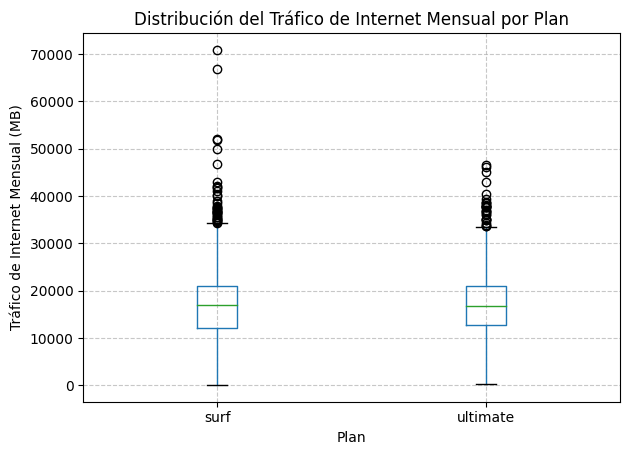

In [41]:
plt.figure(figsize=(14, 8))
monthly_internet_usage.boxplot(column='mb_used', by='plan', grid=False)
plt.title('Distribución del Tráfico de Internet Mensual por Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Tráfico de Internet Mensual (MB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
Los usuarios del plan Ultimate consumen, en promedio, más datos de internet mensualmente  que los del plan Surf pero la diferencia no es muy considerable 
La varianza es similar entre ambos por que la dispersion de los datos es cas igual, y el diagrama de caja nos dice que ambos planes tienen una distribución similar en cuanto al tráfico de Internet mensual. La mayoría de los usuarios consumen menos de 30,000 MB por mes, con algunos outliers que consumen más de 50,000 MB, aunque se puede observar picos mas altos de outliers en el plan Surf.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [40]:
mean_revenue_by_plan = merged_data.groupby('plan')['monthly_revenue'].mean()
variance_revenue_by_plan = merged_data.groupby('plan')['monthly_revenue'].var()

In [41]:
print("Media de los ingresos mensuales por plan:")
print(mean_revenue_by_plan)
print("\nVarianza de los ingresos mensuales por plan:")
print(variance_revenue_by_plan)

Media de los ingresos mensuales por plan:
plan
surf        57.293784
ultimate    72.116080
Name: monthly_revenue, dtype: float64

Varianza de los ingresos mensuales por plan:
plan
surf        2887.544971
ultimate     115.968081
Name: monthly_revenue, dtype: float64


<Figure size 1400x800 with 0 Axes>

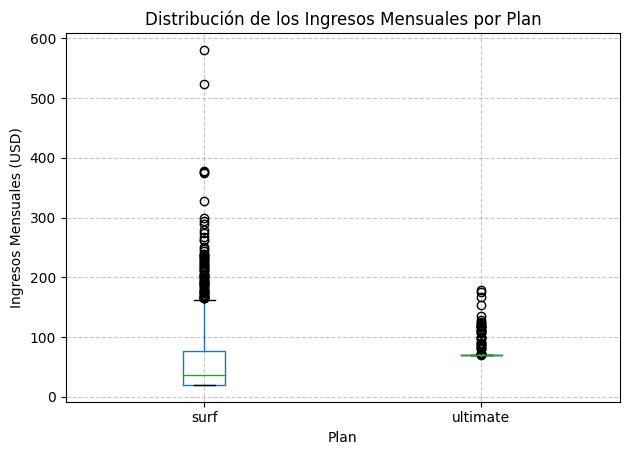

In [42]:
plt.figure(figsize=(14, 8))
merged_data.boxplot(column='monthly_revenue', by='plan', grid=False)
plt.title('Distribución de los Ingresos Mensuales por Plan')
plt.suptitle('')
plt.xlabel('Plan')
plt.ylabel('Ingresos Mensuales (USD)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.show()

[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

Los usuarios del plan Ultimate genera en promedio, una diferencia significativamente superiori ($72.12) que los usuarios del plan Surf ($57.29). La diferencia en los ingresos promedio nos quiere decir que este plan es mas lucrativo para la compania.
La varianza en los ingresos mensuales es mucho mayor para el plan Surf (2887.54) en comparación con el plan Ultimate (115.97). Esto sugiere que hay una mayor variabilidad en los ingresos generados por los usuarios del plan Surf, pero esto se debe a que hay mas ganacias del mismo por lo que siguie siendo el paquete mas conveniente.
El diagrama de caja muestra que la mayoría de los usuarios del plan Ultimate generan ingresos relativamente constantes, mientras que los usuarios del plan Surf muestran una mayor dispersión en los ingresos, con varios outliers (valores atípicos) que generan ingresos significativamente mayores.

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [43]:
# Prueba las hipótesis
ultimate_revenue = merged_data[merged_data['plan'] == 'ultimate']['monthly_revenue']
surf_revenue = merged_data[merged_data['plan'] == 'surf']['monthly_revenue']
t_stat, p_value = st.ttest_ind(ultimate_revenue, surf_revenue, equal_var=False)
alpha = 0.05
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")
if p_value < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio son significativamente diferentes entre los planes Ultimate y Surf.")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia para decir que los ingresos promedio son diferentes entre los planes Ultimate y Surf.")


Estadístico t: 10.489446388254443
Valor p: 4.881852673479799e-25
Rechazamos la hipótesis nula: los ingresos promedio son significativamente diferentes entre los planes Ultimate y Surf.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [54]:




merged_data = merged_data.merge(users[['user_id', 'city']], on='user_id', how='left')
def determine_region(city):
    if 'NY' in city or 'NJ' in city:
        return 'NY-NJ'
    else:
        return 'Other'

merged_data['region'] = merged_data['city'].apply(determine_region)

ny_nj_revenue = merged_data[merged_data['region'] == 'NY-NJ']['monthly_revenue'].dropna()
other_revenue = merged_data[merged_data['region'] == 'Other']['monthly_revenue'].dropna()

print(f"NY-NJ Revenue Data Count: {len(ny_nj_revenue)}")
print(f"Other Revenue Data Count: {len(other_revenue)}")

if len(ny_nj_revenue) == 0 or len(other_revenue) == 0:
    raise ValueError("No hay suficientes datos en una de las categorías para realizar la prueba t.")


t_stat, p_value = st.ttest_ind(ny_nj_revenue, other_revenue, equal_var=False)
alpha = 0.05


print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: los ingresos promedio son significativamente diferentes entre los usuarios del área NY-NJ y otras regiones.")
else:
    print("No podemos rechazar la hipótesis nula: no hay suficiente evidencia para decir que los ingresos promedio son diferentes entre los usuarios del área NY-NJ y otras regiones.")



NY-NJ Revenue Data Count: 488
Other Revenue Data Count: 1805
Estadístico t: -1.7689588905016966
Valor p: 0.07728806533735925
No podemos rechazar la hipótesis nula: no hay suficiente evidencia para decir que los ingresos promedio son diferentes entre los usuarios del área NY-NJ y otras regiones.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]
Para la primera seccion del proyecto es importante considerar la correcta limpieza y tratado de los datos sobre todo los datos nulos y datos de fechas.
En cuanto al segundo punto del proyecto podemos identificar que los datos en cuato a las llamadas que se realizan, los mensajes que se envian y los numeros de megas que se gastan son muy similares para ambos planes aunque cambian un poco en la frecuencia y las variables fuera de rango a favor del plan Surf la varianza y media es muy similar para ambios casos, excepto en el caso de los ingresos en donde se puede notar una sigificativa diferencia a favor del plan de Surf.
Por ultimo tambien podimos concluir que los ingresos si son significativamente diferentes entre ambos planes y que las cuidades de NY y NJ son diferentes a las otras regiones al rechazar ambas hipotesis nulas.
Por lo qe podemos concluir que el mejor plan o el plan que tendria que impulsar y conservar es el plan Surf al recibir mayores ingresos de este plan y presentar variables similares al otro plan.